<a href="https://colab.research.google.com/github/Ankuraxz/Vehicle-make-recognition-classification/blob/main/CAR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: './content/drive/'
/content/car_data


In [2]:
!mkdir "./car_data"
!unzip "/content/drive/MyDrive/VEHICLE_MAKE_CLASSIFICATION/Vehicle Classification.zip" -d "./car_data"

Archive:  /content/drive/MyDrive/VEHICLE_MAKE_CLASSIFICATION/Vehicle Classification.zip
   creating: ./car_data/audi a4/
  inflating: ./car_data/audi a4/1877.jpg  
   creating: ./car_data/bmw 320/
  inflating: ./car_data/bmw 320/552.jpg  
   creating: ./car_data/chevrolet tavera/
  inflating: ./car_data/chevrolet tavera/418.jpg  
  inflating: ./car_data/chevrolet tavera/419.jpg  
   creating: ./car_data/chevrolet Uva Sail/
  inflating: ./car_data/chevrolet Uva Sail/264.jpg  
  inflating: ./car_data/chevrolet Uva Sail/269.jpg  
  inflating: ./car_data/chevrolet Uva Sail/271.jpg  
  inflating: ./car_data/chevrolet Uva Sail/273.jpg  
  inflating: ./car_data/chevrolet Uva Sail/275.jpg  
  inflating: ./car_data/chevrolet Uva Sail/277.jpg  
   creating: ./car_data/fond fiesta/
  inflating: ./car_data/fond fiesta/82.jpg  
  inflating: ./car_data/fond fiesta/84.jpg  
   creating: ./car_data/force/
  inflating: ./car_data/force/47.jpg  
   creating: ./car_data/ford ecosport/
  inflating: ./car_

In [16]:
%cd "../"

/content


In [17]:
!ls

car_data  drive  sample_data


### Original Data Size
+ Classes - 71
+ Images - 1375

In [20]:
# %cd "./car_data"
!ls 
# !find . ! -name . -prune -print | grep -c /

'audi a4'	      'kia Carnival'	    'maruti zen'
'bmw 320'	      'mahindra bolero'     'maruti zen estilo'
'chevrolet tavera'    'mahindra imperio'    'nissan kicks'
'chevrolet Uva Sail'  'Mahindra Marazzo'    'nissan terrano'
'fond fiesta'	      'mahindra scorpio'    'renault duster'
 force		      'mahindra tuv300'     'renault kwid'
'ford ecosport'       'mahindra xuv500'     'skoda rapid'
'ford figo'	      'maruti 800'	    'tata hexa'
'honda amaze'	      'maruti alto'	    'tata indigo'
'honda brv'	      'maruti baleno'	    'tata neno'
'honda city'	      'maruti brezza'	    'tata nexon'
'honda city zx'       'maruti Celario'	    'tata safari'
'honda civic'	      'Maruti Ciaz'	    'tata tiago'
'honda jazz'	      'maruti eeco'	    'Tata Tigor'
'honda mobilio'       'Maruti Ertiga'	    'tata zest'
'honda wrv'	      'maruti ignis'	    'toyota altis'
'hyundai ACCENT'      'maruti omni'	    'toyota etios'
'hyundai creta'       'maruti ritz'	    'toyota etios liva'
'hyundai eon'	      'marut

In [24]:
import matplotlib.pyplot as plt
import os
import numpy as np

%load_ext tensorboard
import tensorboard

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import resnet50


In [25]:
%cd "../"

/content


In [26]:
path = "/content/car_data"
classes = os.listdir(path)
print(len(classes))

71


## DATA AUGUMENTATION

In [27]:
train_datagen=ImageDataGenerator(validation_split=0.2, rescale = 1./255, 
    rotation_range=25,
		zoom_range=0.15,
		width_shift_range=0.25,
		height_shift_range=0.25,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")
#test_dataset = image.ImageDataGenerator(rescale=1./255))

train_generator=train_datagen.flow_from_directory(path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory(
                                                path, # same directory as training data
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='validation') # set as validation data

Found 1124 images belonging to 71 classes.
Found 251 images belonging to 71 classes.


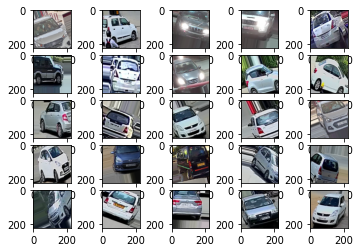

In [28]:
x,y = train_generator.next()

for i in range (25):
  plt.subplot(5,5,1 + i)
  igx1 = x[i]
  plt.imshow(igx1)
plt.show()

## Deep Learning Model - Config 1

In [29]:
model = tf.keras.applications.ResNet50(include_top =False, weights = 'imagenet', input_shape = (224,224,3))

av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu')(d1)
fc3 = Dense(128,activation='relu')(fc2)
fc4 = Dense(71,activation='softmax')(fc3)

model_new = Model(inputs=model.input, outputs= fc4)

for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [30]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
#model.summary()

In [31]:
import tensorflow as tf
import datetime

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard


log_dir = "./car_config1" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [33]:
from numpy.random import seed
seed(1)


In [34]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model_new.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
35/35 [==============================] - 29s 563ms/step - loss: 3.9419 - accuracy: 0.1056 - val_loss: 3.3952 - val_accuracy: 0.1161
Epoch 2/50
35/35 [==============================] - 18s 521ms/step - loss: 3.5666 - accuracy: 0.1100 - val_loss: 3.4410 - val_accuracy: 0.1205
Epoch 3/50
35/35 [==============================] - 18s 525ms/step - loss: 3.4656 - accuracy: 0.1544 - val_loss: 3.4300 - val_accuracy: 0.1875
Epoch 4/50
35/35 [==============================] - 18s 525ms/step - loss: 3.3643 - accuracy: 0.2122 - val_loss: 3.4108 - val_accuracy: 0.2098
Epoch 5/50
35/35 [==============================] - 18s 523ms/step - loss: 3.4339 - accuracy: 0.1533 - val_loss: 3.3631 - val_accuracy: 0.1429
Epoch 6/50
35/35 [==============================] - 18s 521ms/step - loss: 3.3444 - accuracy: 0.1626 - val_loss: 3.3689 - val_accuracy: 0.2277
Epoch 7/50
35/35 [==============================] - 18s 522ms/step - loss: 3.3158 - accuracy: 0.1980 - val_loss: 3.3214 - val_accuracy: 0.1562

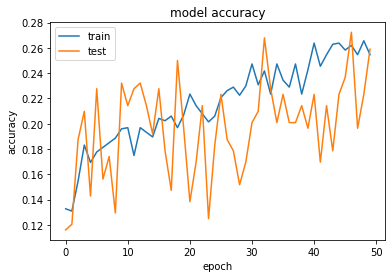

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

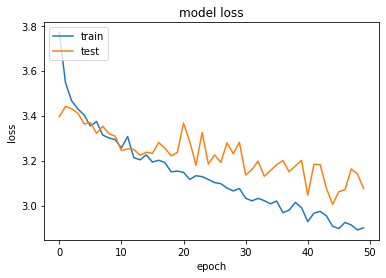

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CAR DETECTION USING HAAR-CASCADE


### CARS HAAR CASCADE : https://github.com/Ankuraxz/Vehicle-make-recognition-classification

In [ ]:
import cv2

In [ ]:
xml_path = "/content/drive/MyDrive/VEHICLE_MAKE_CLASSIFICATION/cars.xml"

In [ ]:
car_cascade = cv2.CascadeClassifier(xml_path)

In [ ]:
def detectcar(img_):
    cars= car_cascade.detectMultiScale(img_,1.3,5)
    #detectmultiscale 1v 2 v3 
        
    for car in cars:
      return car


In [ ]:
os.mkdir("./cars_cascade")
pathx = "./cars_cascade"

In [ ]:
classes = os.listdir(path)
print(len(classes))

71


In [ ]:
!sudo rm -rf "./cars_cascade"


no car detected for 1362.jpg
no car detected for 1388.jpg
no car detected for 1899.jpg
no car detected for 1210.jpg
no car detected for 994.jpg
no car detected for 101.jpg
no car detected for 102.jpg
no car detected for 1333.jpg
no car detected for 768.jpg
no car detected for 1208.jpg
no car detected for 2129.jpg
no car detected for 1000.jpg
no car detected for 1056.jpg
no car detected for 1209.jpg
no car detected for 1913.jpg
no car detected for 1207.jpg
no car detected for 1059.jpg
no car detected for 540.jpg
no car detected for 1935.jpg
no car detected for 1146.jpg
no car detected for 554.jpg
no car detected for 1407.jpg
no car detected for 1050.jpg
no car detected for 826.jpg
no car detected for 996.jpg
no car detected for 928.jpg
no car detected for 1057.jpg
no car detected for 47.jpg
no car detected for 131.jpg
no car detected for 1939.jpg
no car detected for 1941.jpg
no car detected for 935.jpg
no car detected for 148.jpg
no car detected for 1933.jpg
no car detected for 624.jpg


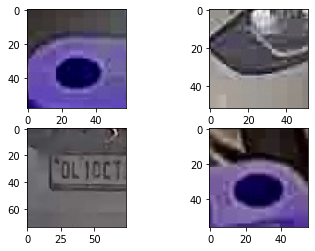

In [ ]:
CARS_cascaded=[]
for i in classes:
      path_img= os.path.join(path,i)
      path_new = os.path.join(pathx,i)
      os.mkdir(path_new)
      for ix in os.listdir(path_img):
        # print(ix)
        path_to_img = os.path.join(path_img,ix)
        img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
        cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        car_cut = detectcar(img)
        if car_cut is None: # No face detected
          print("no car detected for",ix)
          
        else:
          x,y,w,h =car_cut
          car_section = img[y-5:y+h+5,x-5:x+w+5]
          print("CAR DETECTED FOR",ix)
          CARS_cascaded.append(car_section)
          path_to_save = os.path.join(path_new,ix)
          cv2.imwrite(path_to_save,car_section)


for i in range(4):
  plt.subplot(2,2,1+i)
  plt.imshow(CARS_cascaded[i])


## Deep Learning Model Config 2

In [38]:
model = tf.keras.applications.ResNet50(include_top =False, weights = 'imagenet', input_shape = (224,224,3))

av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(256,activation='relu')(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(128,activation='relu')(d2)
fc4 = Dense(71,activation='softmax')(fc3)

model_new2 = Model(inputs=model.input, outputs= fc4)

for ix in range(169):
    model_new2.layers[ix].trainable = False
    
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [39]:
model_new2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [40]:
log_dir = "./car_config2" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

from numpy.random import seed
seed(2)


In [41]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model_new2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
35/35 [==============================] - 28s 662ms/step - loss: 4.2561 - accuracy: 0.0594 - val_loss: 79.9998 - val_accuracy: 0.0848
Epoch 2/50
35/35 [==============================] - 22s 619ms/step - loss: 3.6642 - accuracy: 0.1403 - val_loss: 33.0813 - val_accuracy: 0.1339
Epoch 3/50
35/35 [==============================] - 22s 612ms/step - loss: 3.4831 - accuracy: 0.1385 - val_loss: 37.1565 - val_accuracy: 0.1116
Epoch 4/50
35/35 [==============================] - 22s 614ms/step - loss: 3.5260 - accuracy: 0.1569 - val_loss: 414.9724 - val_accuracy: 0.1429
Epoch 5/50
35/35 [==============================] - 22s 617ms/step - loss: 3.4784 - accuracy: 0.1699 - val_loss: 74.7713 - val_accuracy: 0.1429
Epoch 6/50
35/35 [==============================] - 22s 614ms/step - loss: 3.4124 - accuracy: 0.1661 - val_loss: 8.2505 - val_accuracy: 0.1384
Epoch 7/50
35/35 [==============================] - 22s 616ms/step - loss: 3.4242 - accuracy: 0.1886 - val_loss: 3.4391 - val_accuracy: 

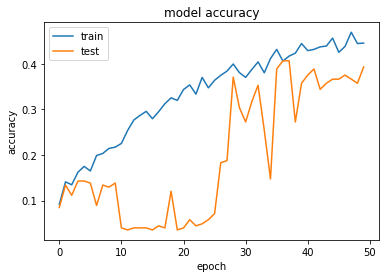

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

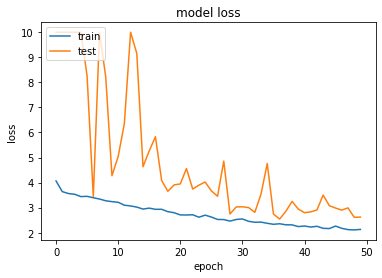

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## DL MODEL CONFIG 3

In [75]:
model = tf.keras.applications.ResNet50(include_top =False, weights = 'imagenet', input_shape = (224,224,3))

av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(512,activation='relu')(av1)
d1 = Dropout(0.3)(fc1)
fc2 = Dense(256,activation='relu')(d1)
d2 = Dropout(0.3)(fc2)
fc3 = Dense(512,activation='relu')(d2)
d3 = Dropout(0.3)(fc3)
fc4 = Dense(256,activation='relu')(d3)
fc5 = Dense(128,activation='relu')(fc4)
fc6 = Dense(71,activation='softmax')(fc5)

model_new3 = Model(inputs=model.input, outputs= fc6)

for ix in range(169):
    model_new3.layers[ix].trainable = False
    
model_new3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [76]:
model_new3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [77]:
log_dir = "./car_config3" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

from numpy.random import seed
seed(2)

In [78]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model_new3.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
35/35 [==============================] - 23s 584ms/step - loss: 3.9539 - accuracy: 0.0872 - val_loss: 3.5948 - val_accuracy: 0.1518
Epoch 2/50
35/35 [==============================] - 19s 529ms/step - loss: 3.5438 - accuracy: 0.1435 - val_loss: 3.4637 - val_accuracy: 0.2188
Epoch 3/50
35/35 [==============================] - 18s 526ms/step - loss: 3.5384 - accuracy: 0.1399 - val_loss: 3.4306 - val_accuracy: 0.1518
Epoch 4/50
35/35 [==============================] - 18s 527ms/step - loss: 3.4042 - accuracy: 0.1807 - val_loss: 3.5291 - val_accuracy: 0.1429
Epoch 5/50
35/35 [==============================] - 18s 525ms/step - loss: 3.3931 - accuracy: 0.1523 - val_loss: 3.4159 - val_accuracy: 0.2054
Epoch 6/50
35/35 [==============================] - 18s 527ms/step - loss: 3.4030 - accuracy: 0.1590 - val_loss: 3.3594 - val_accuracy: 0.2009
Epoch 7/50
35/35 [==============================] - 18s 526ms/step - loss: 3.3405 - accuracy: 0.1747 - val_loss: 3.3795 - val_accuracy: 0.2321

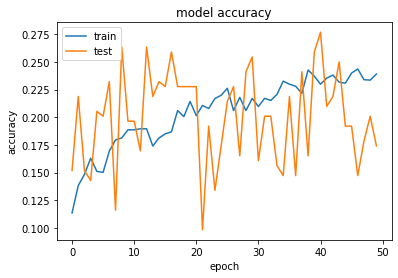

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

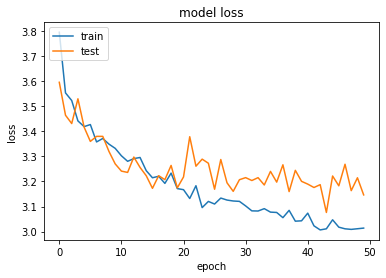

In [80]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()